In [2]:
import numpy as np
import sys

In [3]:
pathsource = '/home/milic/dat/MURaM_400G_plage_pore/'
path3D = pathsource + '3D/'
path2D = pathsource + '2D/'

In [4]:
header = np.loadtxt(path3D+'Header.024000')

nx = np.int64(header[0])
ny = np.int64(header[1])
nz = np.int64(header[2])
dx = np.float64(header[3])
dy = np.float64(header[4])
dz = np.float64(header[5])
time= np.float64(header[6])
delta_t = np.float64(header[7])
maxva= np.float64(header[8])

In [5]:
print(nx, ny, nz, dx, dy, dz, time, delta_t, maxva)

1056 1536 1536 651041.666667 651041.666667 651041.666667 495.183979 0.028394 25000000.0


In [6]:
nx = 1536 
ny = 1536
nz = 1056
Lx = 10e8
Ly = 10e8
Lz =  6.875e8

In [7]:
# To read the information on the time instances themselves, you read the time file:
time = np.fromfile(path2D+'Pore_10Mm_6x6km_res_Bz400G_time_012000_to_044450.dat',dtype=np.float64)
# the file contains the iteration number and simulation solar time [s]
nsnaps = time.size//2
time = time.reshape(2,nsnaps)
#print (nsnaps)
#print (time[1,:])

In [8]:
# Then we can read the timeseries of specific 2D slices, for instance, the horizontal velocity v_x at the photosphere (tau=1) is in the file:
# NOTE THAT I READ VY, because old MURaM notation is still here
# The ordering is, similarly to the most of the MURAM runs, z, x, y. THAT is, if you like your arrays to be indexed as x,y, which means
# you have to plot your images transposed.
# Here I assume that you call x is your variable that is contained in the outer loop i.e. slower index
vx_tau1 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_1.000_vy_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(vx_tau1.shape)

(650, 1536, 1536)


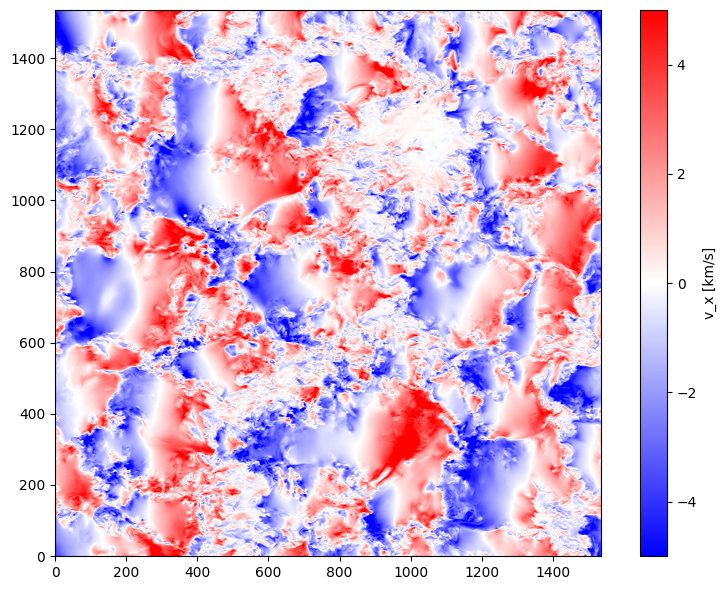

In [9]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize= (8.0,6.0))
plt.imshow(vx_tau1[10,:,:].T/1E5,cmap='bwr',vmin=-5,vmax=5,origin='lower')
plt.tight_layout()
plt.colorbar(label='v_x [km/s]')    
plt.savefig('vx_tau1.png',dpi=150)

In [14]:
Bx_tau1 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_1.000_by_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(Bx_tau1.shape)

(650, 1536, 1536)


In [12]:
# Magnetic field in muram comes in units of np.sqrt(4.0*pi) so :
Bunit = np.sqrt(4.0*np.pi)

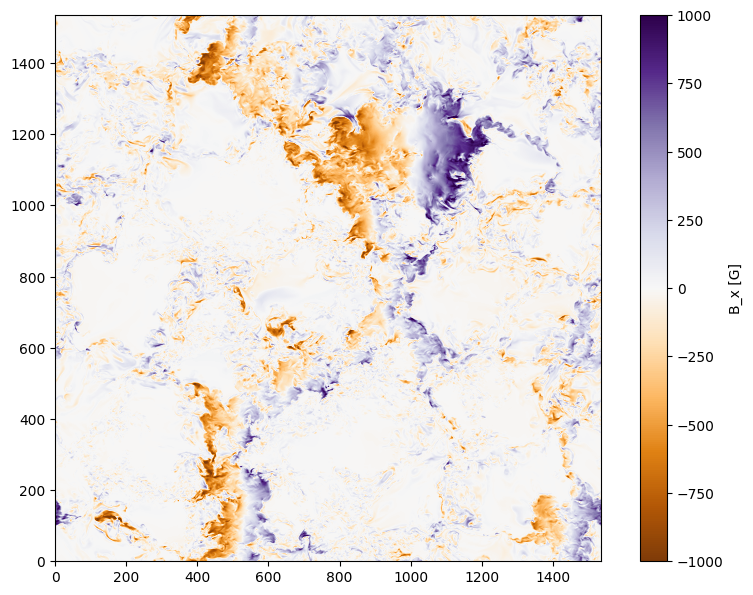

In [19]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize= (8.0,6.0))
plt.imshow(Bx_tau1[10,:,:].T*Bunit,cmap='PuOr',vmin=-1000,vmax=1000,origin='lower')
plt.tight_layout()
plt.colorbar(label='B_x [G]')    
plt.savefig('bx_tau1.png',dpi=150)

In [10]:
Bz_tau1 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_1.000_bx_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(Bz_tau1.shape)

(650, 1536, 1536)


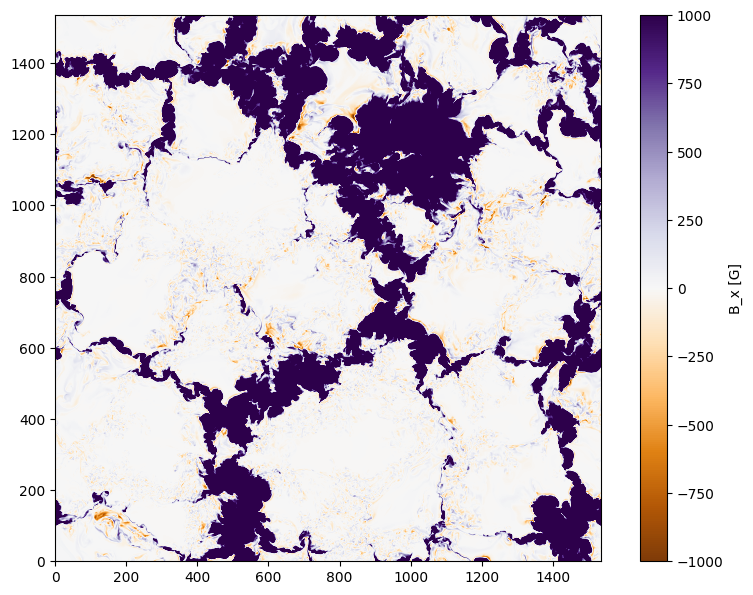

In [13]:
plt.figure(figsize= (8.0,6.0))
plt.imshow(Bz_tau1[10,:,:].T*Bunit,cmap='PuOr',vmin=-1000,vmax=1000,origin='lower')
plt.tight_layout()
plt.colorbar(label='B_x [G]')    
plt.savefig('bx_tau1.png',dpi=150)

In [14]:
# what is mean B at this log tau? 
mean_Bz = np.mean(Bz_tau1*Bunit,axis=(1,2))

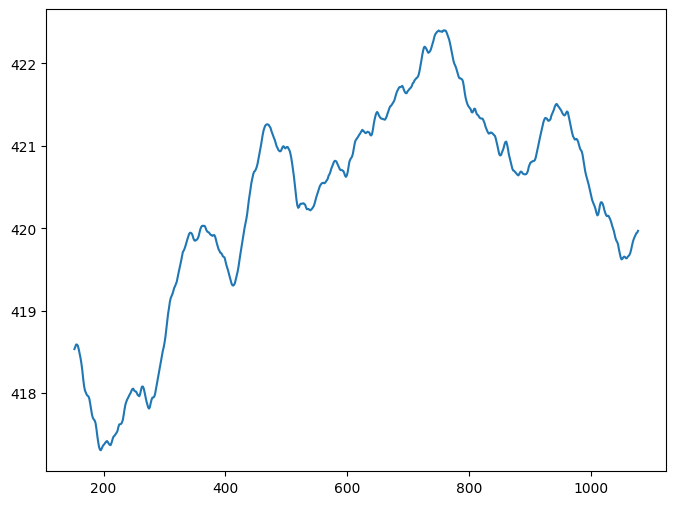

In [15]:
# Plot mean Bz at tau=1 as a function of time
plt.figure(figsize= (8.0,6.0))
plt.plot(time[1,:], mean_Bz)

(650, 1536, 1536)


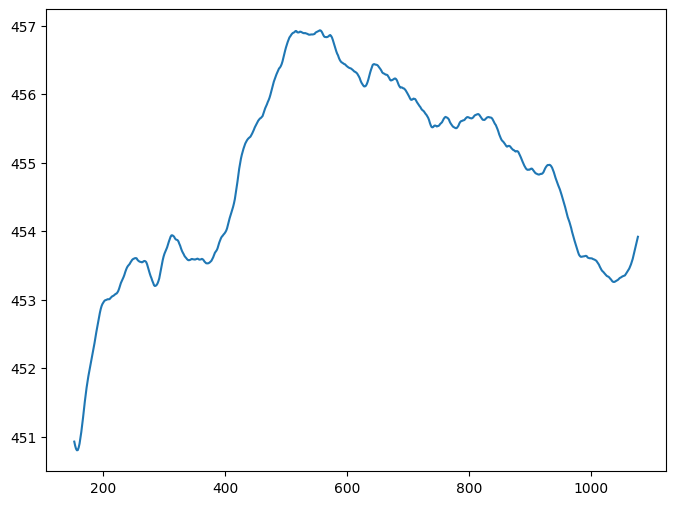

In [16]:
# Repeat this for tau = 0.1
Bz_tau01 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_0.100_bx_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(Bz_tau01.shape)
mean_Bz_tau01 = np.mean(Bz_tau01*Bunit,axis=(1,2))
plt.figure(figsize= (8.0,6.0))
plt.plot(time[1,:], mean_Bz_tau01)

(650, 1536, 1536)


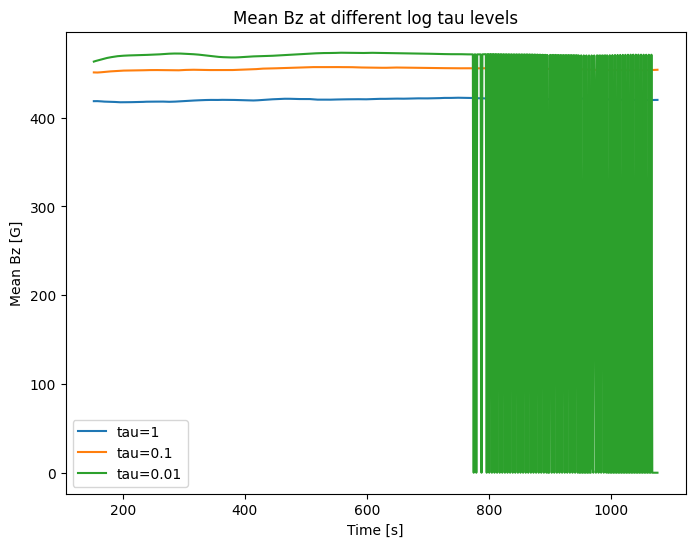

In [ ]:
# At log tau = 0.01 and then compare all three on the same plot
Bz_tau001 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_0.010_bx_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(Bz_tau001.shape)
mean_Bz_tau001 = np.mean(Bz_tau1*Bunit,axis=(1,2))
plt.figure(figsize= (8.0,6.0))
plt.plot(time[1,:], mean_Bz, label='tau=1')
plt.plot(time[1,:], mean_Bz_tau01, label='tau=0.1')
plt.plot(time[1,:], mean_Bz_tau001, label='tau=0.01')
plt.xlabel('Time [s]')
plt.ylabel('Mean Bz [G]')
plt.legend()
plt.title('Mean Bz at different log tau levels')
plt.savefig('mean_Bz_vs_time.png',dpi=150)

(650, 1536, 1536)


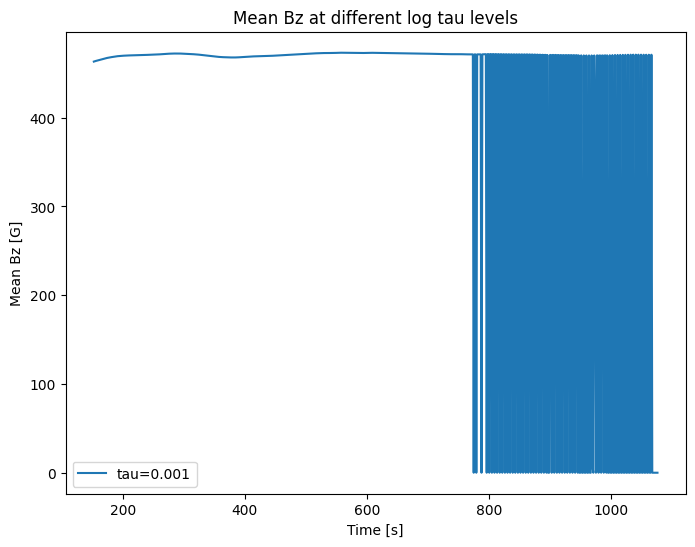

In [29]:
# At log tau = 0.01 and then compare all three on the same plot
Bz_tau0001 = np.memmap(path2D+'Pore_10Mm_6x6km_res_Bz400G_tau_0.001_bx_012000_to_044450.dat',dtype=np.float32,mode='r',shape=(nsnaps,nx,ny))
print(Bz_tau0001.shape)
mean_Bz_tau0001 = np.mean(Bz_tau1*Bunit,axis=(1,2))
plt.figure(figsize= (8.0,6.0))
#plt.plot(time[1,:], mean_Bz, label='tau=1')
#plt.plot(time[1,:], mean_Bz_tau01, label='tau=0.1')
plt.plot(time[1,:], mean_Bz_tau0001, label='tau=0.001')
plt.xlabel('Time [s]')
plt.ylabel('Mean Bz [G]')
plt.legend()
plt.title('Mean Bz at different log tau levels')
plt.savefig('mean_Bz_vs_time.png',dpi=150)

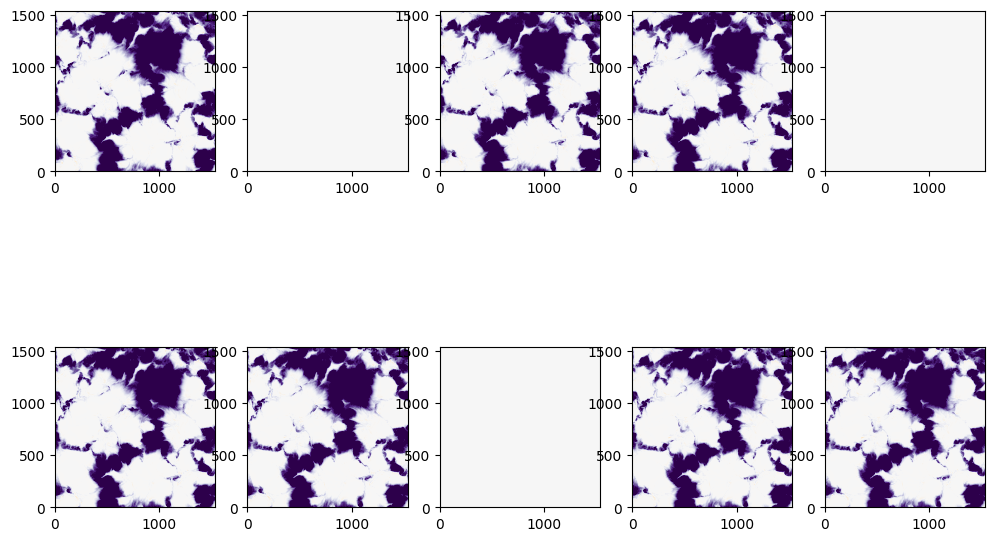

In [27]:
# Plot 2x 5 snapshots here
plt.figure(figsize=(12,8))

i = 1
for idx in range(450,500,5):
    plt.subplot(2,5,i)
    plt.imshow(Bz_tau001[idx,:,:].T*Bunit,cmap='PuOr',vmin=-1000,vmax=1000,origin='lower')
    i += 1

In [23]:
import muram as mio

In [24]:
cube = mio.MuramSnap(path3D, 0)

In [25]:
cube.available

['rho', 'vx', 'vy', 'vz', 'eint', 'Bx', 'By', 'Bz', 'Temp', 'Pres', 'tau']

In [26]:
Temp = cube.Temp

In [27]:
Temp.shape

(1056, 1536, 1536)

In [28]:
Temp = Temp.transpose(1,2,0)

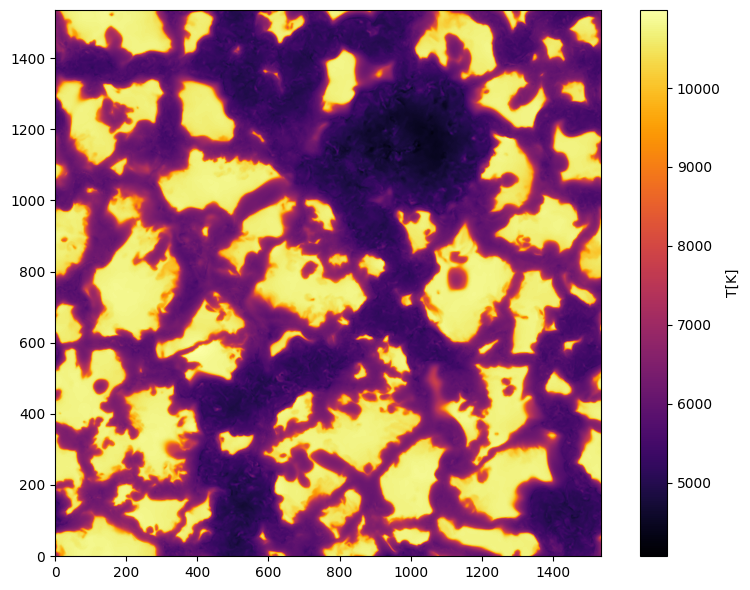

In [35]:
plt.figure(figsize= (8.0,6.0))
plt.imshow(Temp[:,:,800].T,cmap='inferno',origin='lower')
plt.tight_layout()
plt.colorbar(label='T[K]')    
plt.savefig('bx_tau1.png',dpi=150)